In [8]:
import numpy as np
import pandas as pd

In [9]:
# Загружаем данныне 2000-2023

df_list = [pd.read_csv('/wta_matches_' + str(year) + '.csv') for year in range(2000,2023)]

In [10]:
WL_extensions = ['age', 'entry', 'hand', 'ht', 'id', 'ioc', 'name', 'rank', 'rank_points', 'seed']

def obscure_features(DF):
    '''
    Мы заменяем «winner» и «loser» на «player_1» и «player_2» (не обязательно в таком порядке)
    'player_1' заменяет имя игрока, которое идет первым в алфавитном порядке.
    Цель этого состоит в том, чтобы предсказать победителя матча без привязки данных к
    известный победитель или проигравший.
    '''
    DF['player_1'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).min(axis = 1)
    DF['player_2'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).max(axis = 1)
    
    for ext in WL_extensions:
        p1_feature = np.where(DF['player_1'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        p2_feature = np.where(DF['player_2'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        DF['player_1_' + ext] = p1_feature
        DF['player_2_' + ext] = p2_feature
        
    winner_cols = list(filter(lambda x: x.startswith('winner'), DF.columns))
    loser_cols = list(filter(lambda x: x.startswith('loser'), DF.columns))
    cols_to_drop = winner_cols + loser_cols
    
    target = DF['winner_name']
    
    DF.drop(cols_to_drop, axis = 1, inplace = True)
    
    DF['winner'] = target
    
    return DF

In [11]:
matches = obscure_features(pd.concat(df_list, axis = 0))
matches.index = range(matches.shape[0])

In [12]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63125 entries, 0 to 63124
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tourney_id            63125 non-null  object 
 1   tourney_name          63125 non-null  object 
 2   surface               63105 non-null  object 
 3   draw_size             63125 non-null  int64  
 4   tourney_level         63125 non-null  object 
 5   tourney_date          63125 non-null  int64  
 6   match_num             63125 non-null  int64  
 7   score                 63125 non-null  object 
 8   best_of               63125 non-null  int64  
 9   round                 63125 non-null  object 
 10  minutes               17196 non-null  float64
 11  w_ace                 38805 non-null  float64
 12  w_df                  38766 non-null  float64
 13  w_svpt                38807 non-null  float64
 14  w_1stIn               38807 non-null  float64
 15  w_1stWon           

In [13]:
matches.describe()

,draw_size,tourney_date,match_num,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,...,player_1_age,player_2_age,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points
count,63125.000000,6.312500e+04,63125.000000,63125.000000,17196.000000,38805.000000,38766.000000,38807.000000,38807.000000,38807.000000,...,63119.000000,63111.000000,57793.000000,57289.000000,63125.000000,63125.000000,60704.000000,60679.000000,60704.000000,60679.000000
mean,55.314693,2.010625e+07,92.565244,3.002440,97.614096,3.063987,3.259635,69.278146,43.554642,29.649677,...,24.159427,24.410209,173.079421,173.214718,202756.218154,202628.406590,90.017594,91.799568,1315.346831,1316.691458
std,41.352328,6.576011e+04,171.591621,0.069809,40.245521,2.890433,2.622850,23.435462,15.995585,9.519068,...,4.034090,4.275236,6.665434,6.567889,4062.240552,3929.311868,130.122740,126.718717,1398.865391,1510.166136
min,2.000000,2.000010e+07,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.100000,14.000000,152.000000,152.000000,200001.000000,200001.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,2.005042e+07,10.000000,3.000000,73.000000,1.000000,1.000000,52.000000,32.000000,23.000000,...,21.100000,21.200000,168.000000,169.000000,201290.000000,201290.000000,24.000000,26.000000,461.000000,437.000000
50%,32.000000,2.010110e+07,26.000000,3.000000,91.000000,2.000000,3.000000,65.000000,41.000000,28.000000,...,24.000000,24.200000,173.000000,173.000000,201474.000000,201458.000000,54.000000,58.000000,869.000000,819.000000
75%,64.000000,2.016072e+07,124.000000,3.000000,120.000000,4.000000,5.000000,85.000000,53.000000,35.000000,...,26.900000,27.300000,178.000000,178.000000,202379.000000,201689.000000,100.000000,104.000000,1610.000000,1528.000000
max,128.000000,2.022111e+07,2701.000000,5.000000,2475.000000,72.000000,72.000000,918.000000,702.000000,351.000000,...,47.400000,48.600000,190.000000,190.000000,260672.000000,260672.000000,1535.000000,1556.000000,13260.000000,13615.000000


In [14]:
from datetime import timedelta, date

In [15]:
# конвертация турнирной даты

matches['tourney_date'] = pd.to_datetime(matches.tourney_date, format = '%Y%m%d')
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6(6) 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6(1) 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6(4) 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63120,2022-W-FC-2022-QLS-M-ROU-POL-01,BJK Cup QLS R1: ROU vs POL,Hard,4,D,2022-04-15,3,6-0 6-0,3,RR,...,POL,Andreea Prisacariu,Iga Swiatek,324.0,1.0,186.0,6711.0,NaN,NaN,Iga Swiatek
63121,2022-W-FC-2022-QLS-M-USA-UKR-01,BJK Cup QLS R1: USA vs UKR,Hard,4,D,2022-04-15,1,7-6(16) 7-5,3,RR,...,UKR,Alison Riske Amritraj,Dayana Yastremska,43.0,93.0,1201.0,709.0,NaN,NaN,Alison Riske Amritraj
63122,2022-W-FC-2022-QLS-M-USA-UKR-01,BJK Cup QLS R1: USA vs UKR,Hard,4,D,2022-04-15,2,6-2 6-1,3,RR,...,UKR,Jessica Pegula,Katarina Zavatska,14.0,201.0,2510.0,334.0,NaN,NaN,Jessica Pegula
63123,2022-W-FC-2022-QLS-M-USA-UKR-01,BJK Cup QLS R1: USA vs UKR,Hard,4,D,2022-04-15,3,6-3 6-4,3,RR,...,USA,Dayana Yastremska,Jessica Pegula,93.0,14.0,709.0,2510.0,NaN,NaN,Dayana Yastremska


In [16]:
# Распологаем в хронологическом порядке
# Это будет важно, так как многие добавленные функции основаны на предыдущей производительности игрока

matches2 = matches.copy().sort_values(by = ['tourney_date', 'tourney_id', 'match_num'])
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
2041,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,BUL,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva
2042,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,ITA,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin
2043,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,AUS,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6.0,NaN,Nathalie Dechy
2044,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,AUT,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3.0,NaN,Conchita Martinez
2045,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,ESP,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,1,7-6(8) 6-4,3,RR,...,MEX,Olga Danilovic,Renata Zarazua,150.0,350.0,415.0,152.0,NaN,NaN,Renata Zarazua
63100,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,2,5-7 6-3 6-2,3,RR,...,MEX,Lola Radivojevic,Marcela Zacarias,349.0,196.0,153.0,332.0,NaN,NaN,Marcela Zacarias
63101,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,3,6-0 6-4,3,RR,...,SRB,Marcela Zacarias,Natalija Stevanovic,196.0,211.0,332.0,315.0,NaN,NaN,Marcela Zacarias
62926,2022-W-FC-2022-FLS-M-SUI-AUS-01,BJK Cup Finals F: SUI vs AUS,Hard,2,D,2022-11-13,1,6-3 4-6 6-3,3,RR,...,AUS,Jil Teichmann,Storm Sanders,35.0,237.0,1336.0,268.0,NaN,NaN,Jil Teichmann


In [17]:
matches2.index = range(matches2.shape[0])
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,BUL,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,ITA,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,AUS,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6.0,NaN,Nathalie Dechy
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,AUT,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3.0,NaN,Conchita Martinez
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,ESP,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63120,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,1,7-6(8) 6-4,3,RR,...,MEX,Olga Danilovic,Renata Zarazua,150.0,350.0,415.0,152.0,NaN,NaN,Renata Zarazua
63121,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,2,5-7 6-3 6-2,3,RR,...,MEX,Lola Radivojevic,Marcela Zacarias,349.0,196.0,153.0,332.0,NaN,NaN,Marcela Zacarias
63122,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,3,6-0 6-4,3,RR,...,SRB,Marcela Zacarias,Natalija Stevanovic,196.0,211.0,332.0,315.0,NaN,NaN,Marcela Zacarias
63123,2022-W-FC-2022-FLS-M-SUI-AUS-01,BJK Cup Finals F: SUI vs AUS,Hard,2,D,2022-11-13,1,6-3 4-6 6-3,3,RR,...,AUS,Jil Teichmann,Storm Sanders,35.0,237.0,1336.0,268.0,NaN,NaN,Jil Teichmann


In [18]:
# столбец, указывающий, выиграл матч игрок 1 или игрок 2
# будет служить целевой переменной для моделей машинного обучения

matches2['target'] = np.where(matches2['winner'] == matches2['player_1_name'],
                              'player_1',
                              'player_2')
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,target
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,player_2
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,player_2
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6.0,NaN,Nathalie Dechy,player_1
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3.0,NaN,Conchita Martinez,player_1
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,player_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63120,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,1,7-6(8) 6-4,3,RR,...,Olga Danilovic,Renata Zarazua,150.0,350.0,415.0,152.0,NaN,NaN,Renata Zarazua,player_2
63121,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,2,5-7 6-3 6-2,3,RR,...,Lola Radivojevic,Marcela Zacarias,349.0,196.0,153.0,332.0,NaN,NaN,Marcela Zacarias,player_2
63122,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,3,6-0 6-4,3,RR,...,Marcela Zacarias,Natalija Stevanovic,196.0,211.0,332.0,315.0,NaN,NaN,Marcela Zacarias,player_1
63123,2022-W-FC-2022-FLS-M-SUI-AUS-01,BJK Cup Finals F: SUI vs AUS,Hard,2,D,2022-11-13,1,6-3 4-6 6-3,3,RR,...,Jil Teichmann,Storm Sanders,35.0,237.0,1336.0,268.0,NaN,NaN,Jil Teichmann,player_1


In [19]:
# столбец, показывающий общий процент побед игрока до матча

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby('player')

df_list = []
for group, df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
all_players = pd.concat(df_list, axis = 0)

for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_matches',
                  'player_' + str(int(group)) + '_wins']
    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

In [20]:
def winpct(x, y):
    '''
   Поиск % выигрыша игрока
    х = количество совпадений
    у = количество побед
    если х = 0, вернуть 0
    '''
    if x == 0:
        return 0
    else:
        return y/x

winpct_vec = np.vectorize(winpct, otypes=[np.float])
matches2['player_1_win_pct'] = winpct_vec(matches2['player_1_matches'], matches2['player_1_wins'])
matches2['player_2_win_pct'] = winpct_vec(matches2['player_2_matches'], matches2['player_2_wins'])

matches2

<ipython-input-20-2db73c8d05da>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  winpct_vec = np.vectorize(winpct, otypes=[np.float])


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_seed,player_2_seed,winner,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,NaN,NaN,Magdalena Maleeva,player_2,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,NaN,NaN,Tathiana Garbin,player_2,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,6.0,NaN,Nathalie Dechy,player_1,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,3.0,NaN,Conchita Martinez,player_1,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,NaN,NaN,Barbara Rittner,player_1,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63120,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,1,7-6(8) 6-4,3,RR,...,NaN,NaN,Renata Zarazua,player_2,42,22,40,13,0.523810,0.325000
63121,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,2,5-7 6-3 6-2,3,RR,...,NaN,NaN,Marcela Zacarias,player_2,4,0,25,14,0.000000,0.560000
63122,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,3,6-0 6-4,3,RR,...,NaN,NaN,Marcela Zacarias,player_1,26,15,1,0,0.576923,0.000000
63123,2022-W-FC-2022-FLS-M-SUI-AUS-01,BJK Cup Finals F: SUI vs AUS,Hard,2,D,2022-11-13,1,6-3 4-6 6-3,3,RR,...,NaN,NaN,Jil Teichmann,player_1,149,74,38,12,0.496644,0.315789


In [21]:
#  убираем тех у кого меньше 10 игр сыграно
matches2 = matches2[matches2.player_1_win_pct < 10] 
matches2 = matches2[matches2.player_2_win_pct < 10] 

In [22]:
matches2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63125 entries, 0 to 63124
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tourney_id            63125 non-null  object        
 1   tourney_name          63125 non-null  object        
 2   surface               63105 non-null  object        
 3   draw_size             63125 non-null  int64         
 4   tourney_level         63125 non-null  object        
 5   tourney_date          63125 non-null  datetime64[ns]
 6   match_num             63125 non-null  int64         
 7   score                 63125 non-null  object        
 8   best_of               63125 non-null  int64         
 9   round                 63125 non-null  object        
 10  minutes               17196 non-null  float64       
 11  w_ace                 38805 non-null  float64       
 12  w_df                  38766 non-null  float64       
 13  w_svpt          

In [23]:
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_seed,player_2_seed,winner,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,NaN,NaN,Magdalena Maleeva,player_2,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,NaN,NaN,Tathiana Garbin,player_2,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,6.0,NaN,Nathalie Dechy,player_1,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,3.0,NaN,Conchita Martinez,player_1,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,NaN,NaN,Barbara Rittner,player_1,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63120,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,1,7-6(8) 6-4,3,RR,...,NaN,NaN,Renata Zarazua,player_2,42,22,40,13,0.523810,0.325000
63121,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,2,5-7 6-3 6-2,3,RR,...,NaN,NaN,Marcela Zacarias,player_2,4,0,25,14,0.000000,0.560000
63122,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,3,6-0 6-4,3,RR,...,NaN,NaN,Marcela Zacarias,player_1,26,15,1,0,0.576923,0.000000
63123,2022-W-FC-2022-FLS-M-SUI-AUS-01,BJK Cup Finals F: SUI vs AUS,Hard,2,D,2022-11-13,1,6-3 4-6 6-3,3,RR,...,NaN,NaN,Jil Teichmann,player_1,149,74,38,12,0.496644,0.315789


In [24]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', 30)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)


In [25]:
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alicia Molik,Magdalena Maleeva,18.9,24.7,WC,NaN,R,R,182.0,168.0,200008,200086,AUS,BUL,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,player_2,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Magdalena Grzybowska,Tathiana Garbin,21.1,22.5,NaN,Q,R,R,184.0,172.0,200732,200060,POL,ITA,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,player_2,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nathalie Dechy,Nicole Pratt,20.8,26.8,NaN,NaN,R,R,177.0,163.0,200109,200036,FRA,AUS,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6.0,NaN,Nathalie Dechy,player_1,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conchita Martinez,Sylvia Plischke,27.7,22.4,NaN,NaN,R,R,170.0,177.0,200049,200054,ESP,AUT,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3.0,NaN,Conchita Martinez,player_1,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barbara Rittner,Magui Serna,26.6,20.8,NaN,NaN,R,L,173.0,167.0,200094,200027,GER,ESP,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,player_1,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63120,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,1,7-6(8) 6-4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Olga Danilovic,Renata Zarazua,21.8,25.1,NaN,NaN,L,R,NaN,NaN,215337,213887,SRB,MEX,Olga Danilovic,Renata Zarazua,150.0,350.0,415.0,152.0,NaN,NaN,Renata Zarazua,player_2,42,22,40,13,0.523810,0.325000
63121,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,2,5-7 6-3 6-2,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lola Radivojevic,Marcela Zacarias,17.8,28.6,NaN,NaN,U,R,NaN,NaN,236957,204420,SRB,MEX,Lola Radivojevic,Marcela Zacarias,349.0,196.0,153.0,332.0,NaN,NaN,Marcela Zacarias,player_2,4,0,25,14,0.000000,0.560000
63122,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,3,6-0 6-4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcela Zacarias,Natalija Stevanovic,28.6,28.3,NaN,NaN,R,R,NaN,NaN,204420,210337,MEX,SRB,Marcela Zacarias,Natalija Stevanovic,196.0,211.0,332.0,315.0,NaN,NaN,Marcela Zacarias,player_1,26,15,1,0,0.576923,0.000000
63123,2022-W-FC-2022-FLS-M-SUI-AUS-01,BJK Cup Finals F: SUI vs AUS,Hard,2,D,2022-11-13,1,6-3 4-6 6-3,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [26]:
matches2['label'] = np.where(matches2['winner'] == matches2['player_1_name'],
                              1,
                              0)
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct,label
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alicia Molik,Magdalena Maleeva,18.9,24.7,WC,NaN,R,R,182.0,168.0,200008,200086,AUS,BUL,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,player_2,0,0,0,0,0.000000,0.000000,0
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Magdalena Grzybowska,Tathiana Garbin,21.1,22.5,NaN,Q,R,R,184.0,172.0,200732,200060,POL,ITA,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,player_2,0,0,0,0,0.000000,0.000000,0
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nathalie Dechy,Nicole Pratt,20.8,26.8,NaN,NaN,R,R,177.0,163.0,200109,200036,FRA,AUS,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6.0,NaN,Nathalie Dechy,player_1,0,0,0,0,0.000000,0.000000,1
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conchita Martinez,Sylvia Plischke,27.7,22.4,NaN,NaN,R,R,170.0,177.0,200049,200054,ESP,AUT,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3.0,NaN,Conchita Martinez,player_1,0,0,0,0,0.000000,0.000000,1
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barbara Rittner,Magui Serna,26.6,20.8,NaN,NaN,R,L,173.0,167.0,200094,200027,GER,ESP,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,player_1,0,0,0,0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63120,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,1,7-6(8) 6-4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Olga Danilovic,Renata Zarazua,21.8,25.1,NaN,NaN,L,R,NaN,NaN,215337,213887,SRB,MEX,Olga Danilovic,Renata Zarazua,150.0,350.0,415.0,152.0,NaN,NaN,Renata Zarazua,player_2,42,22,40,13,0.523810,0.325000,0
63121,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,2,5-7 6-3 6-2,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lola Radivojevic,Marcela Zacarias,17.8,28.6,NaN,NaN,U,R,NaN,NaN,236957,204420,SRB,MEX,Lola Radivojevic,Marcela Zacarias,349.0,196.0,153.0,332.0,NaN,NaN,Marcela Zacarias,player_2,4,0,25,14,0.000000,0.560000,0
63122,2022-W-FC-2022-POS-M-SRB-MEX-01,BJK Cup Playoffs: SRB vs MEX,Clay,4,D,2022-11-12,3,6-0 6-4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcela Zacarias,Natalija Stevanovic,28.6,28.3,NaN,NaN,R,R,NaN,NaN,204420,210337,MEX,SRB,Marcela Zacarias,Natalija Stevanovic,196.0,211.0,332.0,315.0,NaN,NaN,Marcela Zacarias,player_1,26,15,1,0,0.576923,0.000000,1
63123,2022-W-FC-2022-FLS-M-SUI-AUS-01,BJK Cup Finals F: SUI vs AUS,Hard,2,D,2022-11-13,1,6-3 4-6 6-3,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# **Предобработка**

In [27]:
matches2[matches2['player_1_hand'] == 'U'].count()

tourney_id          2336
tourney_name        2336
surface             2332
draw_size           2336
tourney_level       2336
                    ... 
player_2_matches    2336
player_2_wins       2336
player_1_win_pct    2336
player_2_win_pct    2336
label               2336
Length: 60, dtype: int64

In [28]:
matches2['player_1_hand'].unique ()

array(['R', 'L', 'U', nan], dtype=object)

In [29]:
matches2['player_2_hand'].unique ()

array(['R', 'L', 'U'], dtype=object)

In [30]:
# удаление строк со значением 'U' (unknown)
matches2 = matches2[matches2['player_2_hand'] != 'U'] 
matches2 = matches2[matches2['player_1_hand'] != 'U'] 

In [31]:
matches2['player_2_hand'].unique ()

array(['R', 'L'], dtype=object)

In [32]:
matches2['player_1_hand'].unique ()

array(['R', 'L', nan], dtype=object)

In [33]:
matches2['surface'].unique()

array(['Hard', 'Carpet', 'Clay', 'Grass', nan], dtype=object)

In [34]:
matches2['player_1_age'].unique()
matches2['player_2_age'].unique()

array([24.7, 22.5, 26.8, 22.4, 20.8, 21.7, 27.6, 23.6, 28. , 21.9, 23.9,
       18.8, 27.7, 23.3, 23.2, 21. , 25.6, 21.4, 19.6, 28.7, 26.2, 20.7,
       23.5, 24.8, 25.4, 18.9, 25.5, 20.5, 23.8, 24.3, 20.1, 26.4, 20.4,
       29.3, 16.7, 19.3, 26.6, 24.9, 23.7, 19.2, 18.5, 23.4, 20.9, 26. ,
       22.1, 17.6, 22.7, 28.8, 24.1, 27.3, 27.2, 24.6, 16.5, 17.8, 27.1,
       22. , 22.6, 26.7, 20.2, 18.3, 29.4, 16.6, 21.6, 22.8, 25.3, 24.5,
       19.4, 25. , 32.2, 17.7, 15.7, 26.3, 19.9, 19.5, 18.2, 28.5, 25.8,
       26.9, 22.2, 27.8, 21.8, 24.2, 32.3, 25.7, 28.9, 21.5, 28.6, 19.7,
       21.2, 20. , 27.4, 24.4, 26.1, 20.3, 21.1, 24. , 26.5, 18.6, 25.2,
       27.9, 17.9, 18.7, 25.1, 19. , 19.1, 22.3, 22.9, 18.4, 18. , 16.9,
       21.3, 29.5, 27. , 17. , 32.4, 18.1, 14.2, 29. , 28.3, 15.9, 25.9,
       28.4, 23. , 23.1, 15.8, 29.6, 16.8, 32.5, 27.5, 19.8, 16.1, 29.7,
       29.1, 28.1, 16.2, 32.6, 17.1, 16. , 17.3, 29.8, 17.2, 28.2, 29.2,
       20.6, 17.4, 15.6, 17.5, 32.7, 29.9, 32.8, 30

In [35]:
matches2.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes',
       'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms',
       'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn',
       'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'player_1',
       'player_2', 'player_1_age', 'player_2_age', 'player_1_entry',
       'player_2_entry', 'player_1_hand', 'player_2_hand', 'player_1_ht',
       'player_2_ht', 'player_1_id', 'player_2_id', 'player_1_ioc',
       'player_2_ioc', 'player_1_name', 'player_2_name', 'player_1_rank',
       'player_2_rank', 'player_1_rank_points', 'player_2_rank_points',
       'player_1_seed', 'player_2_seed', 'winner', 'target',
       'player_1_matches', 'player_1_wins', 'player_2_matches',
       'player_2_wins', 'player_1_win_pct', 'player_2_win_pct', 'label'],
      dtype='object')

In [36]:
matches3 = matches2.drop(columns=['tourney_id', 'tourney_name', 'draw_size',
       'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes',
       'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms',
       'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn',
       'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'player_1_entry',
       'player_2_entry', 'player_1_id', 'player_2_id', 'player_1_ioc',
       'player_2_ioc', 'player_1_name', 'player_2_name', 'player_1_rank_points', 'player_2_rank_points',
       'player_1_seed', 'player_2_seed', 'winner', 'target',
       'player_1_matches', 'player_1_wins', 'player_2_matches',
       'player_2_wins'])
print("remained features ", matches3.columns)

remained features  Index(['surface', 'tourney_level', 'player_1', 'player_2', 'player_1_age',
       'player_2_age', 'player_1_hand', 'player_2_hand', 'player_1_ht',
       'player_2_ht', 'player_1_rank', 'player_2_rank', 'player_1_win_pct',
       'player_2_win_pct', 'label'],
      dtype='object')


In [37]:
matches3

,surface,tourney_level,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_rank,player_2_rank,player_1_win_pct,player_2_win_pct,label
0,Hard,T3,Alicia Molik,Magdalena Maleeva,18.9,24.7,R,R,182.0,168.0,96.0,76.0,0.000000,0.000000,0
1,Hard,T3,Magdalena Grzybowska,Tathiana Garbin,21.1,22.5,R,R,184.0,172.0,202.0,126.0,0.000000,0.000000,0
2,Hard,T3,Nathalie Dechy,Nicole Pratt,20.8,26.8,R,R,177.0,163.0,25.0,56.0,0.000000,0.000000,1
3,Hard,T3,Conchita Martinez,Sylvia Plischke,27.7,22.4,R,R,170.0,177.0,15.0,35.0,0.000000,0.000000,1
4,Hard,T3,Barbara Rittner,Magui Serna,26.6,20.8,R,L,173.0,167.0,59.0,39.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63119,Hard,D,Ana Bogdan,Panna Udvardy,29.9,24.1,R,R,171.0,170.0,48.0,83.0,0.437500,0.272727,1
63120,Clay,D,Olga Danilovic,Renata Zarazua,21.8,25.1,L,R,NaN,NaN,150.0,350.0,0.523810,0.325000,0
63122,Clay,D,Marcela Zacarias,Natalija Stevanovic,28.6,28.3,R,R,NaN,NaN,196.0,211.0,0.576923,0.000000,1
63123,Hard,D,Jil Teichmann,Storm Sanders,25.3,28.2,L,L,170.0,166.0,35.0,237.0,0.496644,0.315789,1


In [38]:
# считаем количество Nan значений
none_percent = matches3.isnull().sum() * 100 / len(matches3)
none_values_df = pd.DataFrame({'Feature name': matches3.columns, 'None values count': matches3.isnull().sum(),
                                 'None values percent': none_percent})
print(none_values_df.reset_index().drop(columns=['index']))

        Feature name  None values count  None values percent
0            surface                 14             0.023616
1      tourney_level                  0             0.000000
2           player_1                  0             0.000000
3           player_2                  0             0.000000
4       player_1_age                  0             0.000000
5       player_2_age                  0             0.000000
6      player_1_hand                  1             0.001687
7      player_2_hand                  0             0.000000
8        player_1_ht               2612             4.406133
9        player_2_ht               3076             5.188846
10     player_1_rank                753             1.270221
11     player_2_rank                750             1.265161
12  player_1_win_pct                  0             0.000000
13  player_2_win_pct                  0             0.000000
14             label                  0             0.000000


In [39]:
# удаление строк со значением 0 1
matches3 = matches3[matches3['player_1_win_pct'] != 0.] 
matches3 = matches3[matches3['player_1_win_pct'] != 1.] 
matches3 = matches3[matches3['player_1_win_pct'] != "Nan"] 

In [40]:
# удаление строк со значением 0 1
matches3 = matches3[matches3['player_2_win_pct'] != 0.] 
matches3 = matches3[matches3['player_2_win_pct'] != 1.] 
matches3 = matches3[matches3['player_2_win_pct'] != "Nan"] 

In [41]:
# matches3['player_1_win_pct'].unique()

In [42]:
matches3

,surface,tourney_level,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_rank,player_2_rank,player_1_win_pct,player_2_win_pct,label
63,Hard,T2,Anne Kremer,Conchita Martinez,24.2,27.7,R,R,165.0,170.0,31.0,15.0,0.800000,0.800000,0
66,Hard,T2,Anna Kournikova,Sabine Appelmans,18.5,27.7,R,L,173.0,168.0,12.0,30.0,0.500000,0.333333,1
82,Hard,T2,Alexandra Stevenson,Anna Kournikova,19.0,18.5,R,R,185.0,173.0,45.0,12.0,0.500000,0.750000,0
108,Hard,T4,Maria Vento Kabchi,Patty Schnyder,25.6,21.0,R,L,168.0,168.0,113.0,26.0,0.500000,0.500000,1
113,Hard,T4,Maria Vento Kabchi,Maureen Drake,25.6,28.8,R,R,168.0,175.0,113.0,59.0,0.666667,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63116,Clay,D,Diana Marcinkevica,Tamira Paszek,30.2,31.9,R,R,170.0,165.0,300.0,492.0,0.275862,0.428000,0
63119,Hard,D,Ana Bogdan,Panna Udvardy,29.9,24.1,R,R,171.0,170.0,48.0,83.0,0.437500,0.272727,1
63120,Clay,D,Olga Danilovic,Renata Zarazua,21.8,25.1,L,R,NaN,NaN,150.0,350.0,0.523810,0.325000,0
63123,Hard,D,Jil Teichmann,Storm Sanders,25.3,28.2,L,L,170.0,166.0,35.0,237.0,0.496644,0.315789,1


In [43]:
matches3.dropna(subset=['player_1_ht', 'player_2_ht','player_1_rank','player_2_rank','surface','player_1_hand'], inplace=True)
matches3 =matches3.reset_index(drop=True)
matches3

,surface,tourney_level,player_1,player_2,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_rank,player_2_rank,player_1_win_pct,player_2_win_pct,label
0,Hard,T2,Anne Kremer,Conchita Martinez,24.2,27.7,R,R,165.0,170.0,31.0,15.0,0.800000,0.800000,0
1,Hard,T2,Anna Kournikova,Sabine Appelmans,18.5,27.7,R,L,173.0,168.0,12.0,30.0,0.500000,0.333333,1
2,Hard,T2,Alexandra Stevenson,Anna Kournikova,19.0,18.5,R,R,185.0,173.0,45.0,12.0,0.500000,0.750000,0
3,Hard,T4,Maria Vento Kabchi,Patty Schnyder,25.6,21.0,R,L,168.0,168.0,113.0,26.0,0.500000,0.500000,1
4,Hard,T4,Maria Vento Kabchi,Maureen Drake,25.6,28.8,R,R,168.0,175.0,113.0,59.0,0.666667,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,Clay,D,Jelena Ostapenko,Tamira Paszek,25.4,31.9,R,R,177.0,165.0,18.0,492.0,0.573034,0.425703,1
51300,Clay,D,Diana Marcinkevica,Tamira Paszek,30.2,31.9,R,R,170.0,165.0,300.0,492.0,0.275862,0.428000,0
51301,Hard,D,Ana Bogdan,Panna Udvardy,29.9,24.1,R,R,171.0,170.0,48.0,83.0,0.437500,0.272727,1
51302,Hard,D,Jil Teichmann,Storm Sanders,25.3,28.2,L,L,170.0,166.0,35.0,237.0,0.496644,0.315789,1


In [44]:
matches3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   surface           51304 non-null  object 
 1   tourney_level     51304 non-null  object 
 2   player_1          51304 non-null  object 
 3   player_2          51304 non-null  object 
 4   player_1_age      51304 non-null  float64
 5   player_2_age      51304 non-null  float64
 6   player_1_hand     51304 non-null  object 
 7   player_2_hand     51304 non-null  object 
 8   player_1_ht       51304 non-null  float64
 9   player_2_ht       51304 non-null  float64
 10  player_1_rank     51304 non-null  float64
 11  player_2_rank     51304 non-null  float64
 12  player_1_win_pct  51304 non-null  float64
 13  player_2_win_pct  51304 non-null  float64
 14  label             51304 non-null  int64  
dtypes: float64(8), int64(1), object(6)
memory usage: 5.9+ MB


In [45]:
matches4 = matches3.drop(columns=['player_1', 'player_2'])
print("remained features ", matches4.columns)

remained features  Index(['surface', 'tourney_level', 'player_1_age', 'player_2_age',
       'player_1_hand', 'player_2_hand', 'player_1_ht', 'player_2_ht',
       'player_1_rank', 'player_2_rank', 'player_1_win_pct',
       'player_2_win_pct', 'label'],
      dtype='object')


In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
matches4['player_1_hand'].unique()

array(['R', 'L'], dtype=object)

In [48]:
# катеригориальные переменные
matches4['player_1_hand'] = matches4['player_1_hand'].map({'R': 0,'L': 1})
matches4['player_2_hand'] = matches4['player_2_hand'].map({'R': 0,'L': 1})
matches4['surface'] = matches4['surface'].map({'Hard': 0,'Carpet': 1,'Clay': 2,'Grass': 3})
matches4['tourney_level'] = matches4['tourney_level'].map({'T2': 0,'T4': 1,'G': 2,'T1': 3,'T3': 4,'CC': 5,'D': 6,'O': 7,
                                                'F': 8,'T5': 9,'I': 10,'P': 11,'PM': 12,'W': 13})


In [49]:
# hand_encoder = LabelEncoder()
# matches4['player_1_hand'] = hand_encoder.fit_transform(matches4['player_1_hand'].astype(str))
# matches4['player_2_hand'] = hand_encoder.transform(matches4['player_2_hand'].astype(str))

# matches4['surface'] = LabelEncoder().fit_transform(matches4['surface'].astype(str))
# matches4['tourney_level'] = LabelEncoder().fit_transform(matches4['tourney_level'].astype(str))
# matches4 =matches4.reset_index(drop=True)
# matches4.info()

<Axes: >

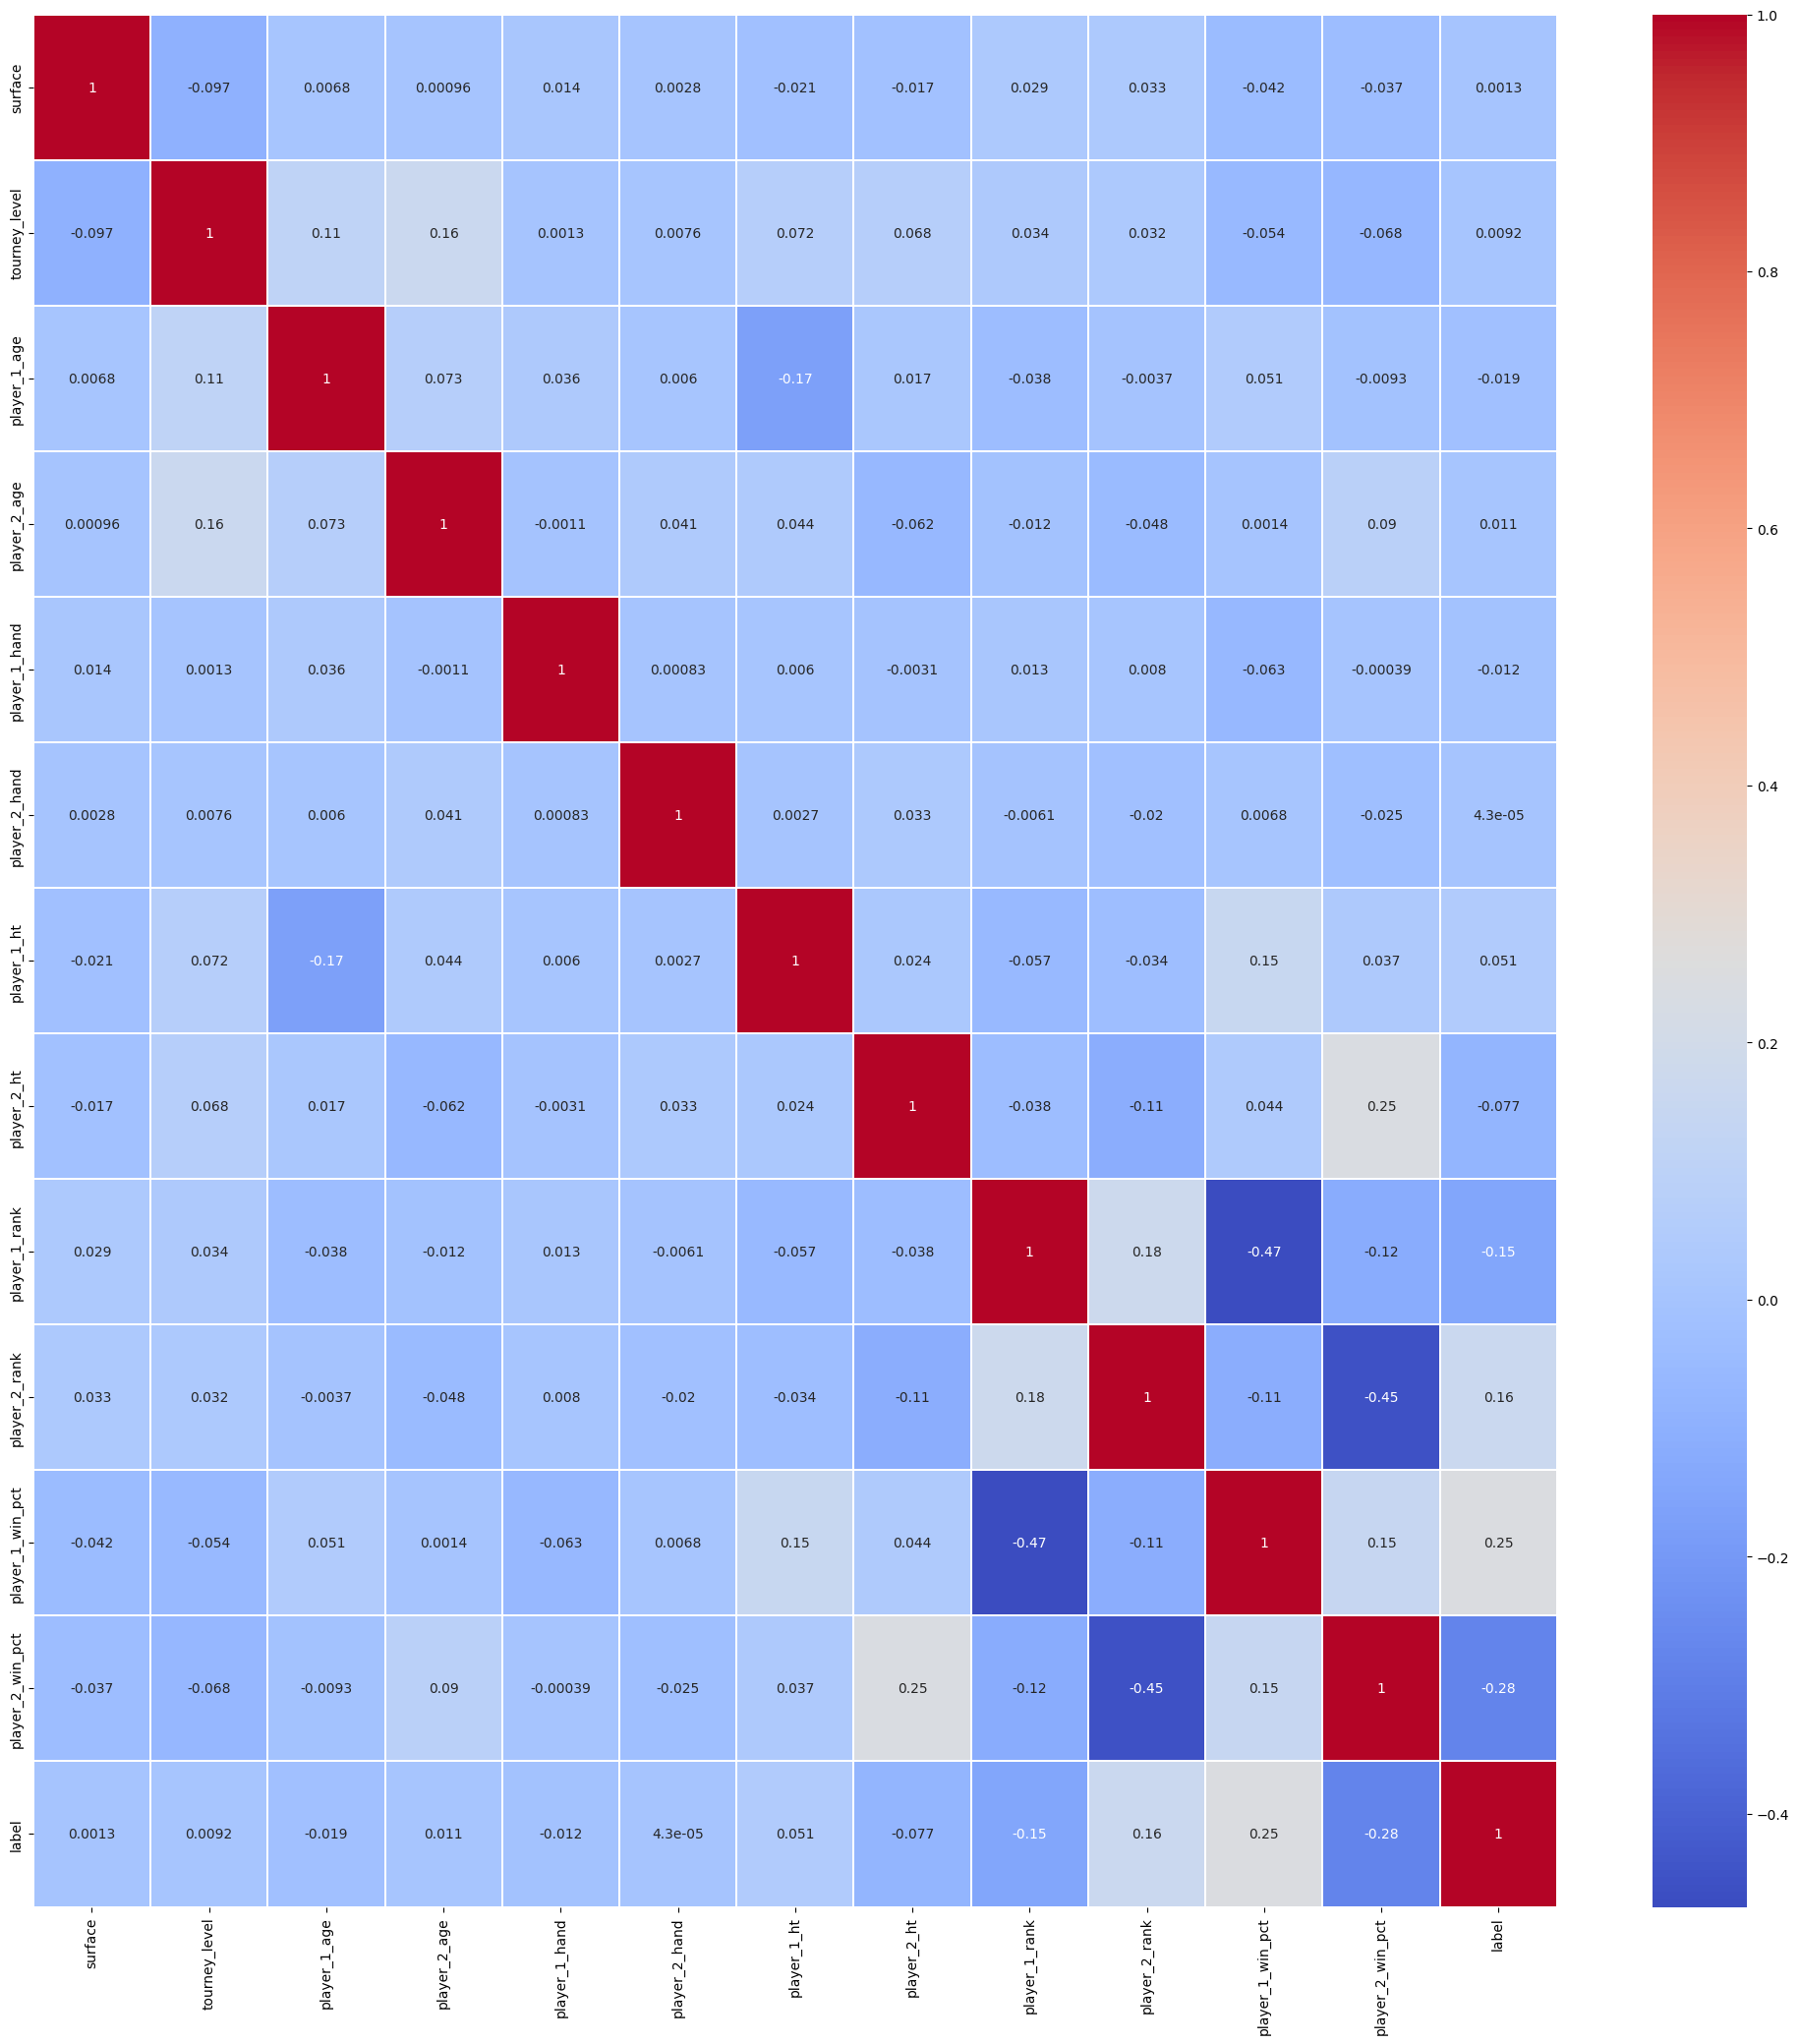

In [50]:
correlation_matrix = matches4.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'coolwarm')

# **Предсказательные модели**

In [51]:
y = matches4['label']
df_X = matches4.drop(columns='label')

In [52]:
# делим данные : 80% для обучения и 20% для теста.
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, shuffle = True, random_state = 42)

**RandomForest**

In [53]:
# RF_classifier = RandomForestClassifier()
# RF_classifier.fit(X = matches4.drop(['label'], axis=1),
#                    y = matches4['label'])

# RF_classifier_imp = pd.Series(RF_classifier.feature_importances_,
#                          matches4.drop(['label'], axis=1).columns)

# fig, ax = plt.subplots(figsize=(16,14))
# RF_classifier_imp.plot.bar(ax=ax)
# ax.set_title("Важность признаков")
# ax.set_ylabel('Важность')
# fig.tight_layout()

In [54]:
#Вызов классификатора
RF_classifier = RandomForestClassifier(n_estimators=100, criterion='log_loss')
#fit 
RF_classifier.fit(X_train, y_train)
#predict 
RF_predictions = RF_classifier.predict(X_test)

In [55]:
print('Confusion matrix')
print(confusion_matrix(y_test,RF_predictions))
print('Classification report')
print(classification_report(y_test,RF_predictions))
print('Accuracy= ', accuracy_score(y_test, RF_predictions))

Confusion matrix
[[3364 1665]
 [1740 3492]]
Classification report
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      5029
           1       0.68      0.67      0.67      5232

    accuracy                           0.67     10261
   macro avg       0.67      0.67      0.67     10261
weighted avg       0.67      0.67      0.67     10261

Accuracy=  0.6681609979534159


In [56]:
print(RF_classifier)
print(RF_classifier.score(X_train, y_train))
print(RF_classifier.score(X_test, y_test)) 

RandomForestClassifier(criterion='log_loss')
1.0
0.6681609979534159


**XGBoost**

In [57]:
#Вызов классификатора
XGB_classifier = XGBClassifier()
#fit 
XGB_classifier.fit(X_train, y_train)
#predict 
XGB_predictions = XGB_classifier.predict(X_test)

In [58]:
print('Confusion matrix')
print(confusion_matrix(y_test,XGB_predictions))
print('Classification report')
print(classification_report(y_test,XGB_predictions))
print('Accuracy= ', accuracy_score(y_test, XGB_predictions))

Confusion matrix
[[3352 1677]
 [1674 3558]]
Classification report
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5029
           1       0.68      0.68      0.68      5232

    accuracy                           0.67     10261
   macro avg       0.67      0.67      0.67     10261
weighted avg       0.67      0.67      0.67     10261

Accuracy=  0.6734236429197934


In [59]:
print(XGB_classifier)
print(XGB_classifier.score(X_train, y_train))
print(XGB_classifier.score(X_test, y_test)) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.7616889603586482
0.6734236429197934


**Logistic Regression**

In [60]:
#Вызов классификатора
logit_classifier = LogisticRegression(solver='liblinear')
#fit 
logit_classifier.fit(X_train, y_train)
#predict 
logit_predictions = logit_classifier.predict(X_test)

In [61]:
print('Confusion matrix')
print(confusion_matrix(y_test,logit_predictions))
print('Classification report')
print(classification_report(y_test,logit_predictions))
print('Accuracy= ', accuracy_score(y_test, logit_predictions))

Confusion matrix
[[3340 1689]
 [1645 3587]]
Classification report
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      5029
           1       0.68      0.69      0.68      5232

    accuracy                           0.68     10261
   macro avg       0.67      0.67      0.67     10261
weighted avg       0.68      0.68      0.68     10261

Accuracy=  0.6750804015203197


In [62]:
print(logit_classifier)
print(logit_classifier.score(X_train, y_train))
print(logit_classifier.score(X_test, y_test)) 

LogisticRegression(solver='liblinear')
0.6772896718076165
0.6750804015203197


**GradientBoosting**

In [63]:
#Вызов классификатора
gbc_classifier = GradientBoostingClassifier(max_features = 'sqrt')
#fit 
gbc_classifier.fit(X_train, y_train)
#predict 
gbc_predictions = gbc_classifier.predict(X_test)

In [64]:
print('Confusion matrix')
print(confusion_matrix(y_test,gbc_predictions))
print('Classification report')
print(classification_report(y_test,gbc_predictions))
print('Accuracy= ', accuracy_score(y_test, gbc_predictions))

Confusion matrix
[[3354 1675]
 [1669 3563]]
Classification report
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5029
           1       0.68      0.68      0.68      5232

    accuracy                           0.67     10261
   macro avg       0.67      0.67      0.67     10261
weighted avg       0.67      0.67      0.67     10261

Accuracy=  0.6741058376376572


In [65]:
print(gbc_classifier)
print(gbc_classifier.score(X_train, y_train))
print(gbc_classifier.score(X_test, y_test))

GradientBoostingClassifier(max_features='sqrt')
0.6845259849426212
0.6741058376376572


In [66]:
mask1 = (matches3['player_1_rank'] < matches3['player_2_rank']) & (matches3['label'] == 1)
mask2 = (matches3['player_2_rank'] < matches3['player_1_rank']) & (matches3['label'] == 0)

matches3[mask1 | mask2].shape[0] / matches3.shape[0]

# 64.55% матчей выигрывают игроки боллее высокого рейтинга. Это будет базовым ориентиром для моделей.

0.6455831903945112

In [67]:
import pickle

In [68]:
pickle.dump(gbc_classifier, open('model.pkl', 'wb'))

In [69]:
model_load = pickle.load(open('model.pkl', 'rb'))

In [70]:
model_load.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [71]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
# глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [73]:
matches4.describe()

,surface,tourney_level,player_1_age,player_2_age,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_rank,player_2_rank,player_1_win_pct,player_2_win_pct,label
count,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000
mean,0.887436,6.259453,24.572462,24.891240,0.081690,0.090110,173.153770,173.335120,63.740800,65.903672,0.512826,0.513725,0.504366
std,1.129225,4.282346,3.878834,4.135585,0.273894,0.286342,6.683715,6.595779,71.659991,70.845556,0.122217,0.131613,0.499986
min,0.000000,0.000000,15.000000,14.500000,0.000000,0.000000,153.000000,153.000000,1.000000,1.000000,0.050000,0.043478,0.000000
25%,0.000000,2.000000,21.600000,21.800000,0.000000,0.000000,168.000000,169.000000,21.000000,23.000000,0.439100,0.434524,0.000000
50%,0.000000,6.000000,24.400000,24.600000,0.000000,0.000000,173.000000,173.000000,47.000000,51.000000,0.510813,0.500000,1.000000
75%,2.000000,10.000000,27.200000,27.600000,0.000000,0.000000,178.000000,178.000000,84.000000,88.000000,0.587379,0.591304,1.000000
max,3.000000,13.000000,44.900000,47.600000,1.000000,1.000000,190.000000,190.000000,1323.000000,1556.000000,0.958333,0.954545,1.000000


In [74]:
matches4['label'].value_counts()

1    25876
0    25428
Name: label, dtype: int64

**Нейронная сеть**

In [75]:
n_features = df_X.shape[1]
n_features

12

In [76]:
# model= Sequential()
# model.add(Dense(128, activation='relu', input_shape=(n_features,)))
# model.add(Dense(20, activation='relu'))
# # выходной слой
# model.add(Dense(1, activation='sigmoid'))

# # компилируем модель
# model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

# # обучение модели
# history= model.fit(X_train, y_train,
#                    epochs = 200,
#                    batch_size = 32,
#                    verbose = 1,
#                    validation_data = (X_test, y_test)) 

# # estimate accuracy on whole dataset using loaded weights
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



In [77]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)

In [80]:
#  plot_loss(history)

In [82]:
# score = model.evaluate(X_test, y_test, verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])

In [107]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import datetime

In [152]:
input_shape = (X_train.shape[1])
batch_size = 32
epochs = 5000


In [153]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(20, activation="relu"),
        # layers.Dense(10, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [154]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=0,
    save_best_only=True, mode='auto', save_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_split=0.2, 
                    callbacks=[checkpoint, early_stopping])

Epoch 1/5000
1027/1027 [==============================] - 16s 15ms/step - loss: 2.0625 - accuracy: 0.5567 - val_loss: 0.7754 - val_accuracy: 0.5799
Epoch 2/5000
1027/1027 [==============================] - 2s 2ms/step - loss: 0.7122 - accuracy: 0.5950 - val_loss: 0.6665 - val_accuracy: 0.6226
Epoch 3/5000
1027/1027 [==============================] - 2s 2ms/step - loss: 0.6569 - accuracy: 0.6258 - val_loss: 0.6379 - val_accuracy: 0.6363
Epoch 4/5000
1027/1027 [==============================] - 3s 3ms/step - loss: 0.6457 - accuracy: 0.6335 - val_loss: 0.6334 - val_accuracy: 0.6425
Epoch 5/5000
1027/1027 [==============================] - 2s 2ms/step - loss: 0.6399 - accuracy: 0.6359 - val_loss: 0.6654 - val_accuracy: 0.6085
Epoch 6/5000
1027/1027 [==============================] - 2s 2ms/step - loss: 0.6389 - accuracy: 0.6378 - val_loss: 0.6284 - val_accuracy: 0.6439
Epoch 7/5000
1027/1027 [==============================] - 2s 2ms/step - loss: 0.6341 - accuracy: 0.6395 - val_loss: 0.6278

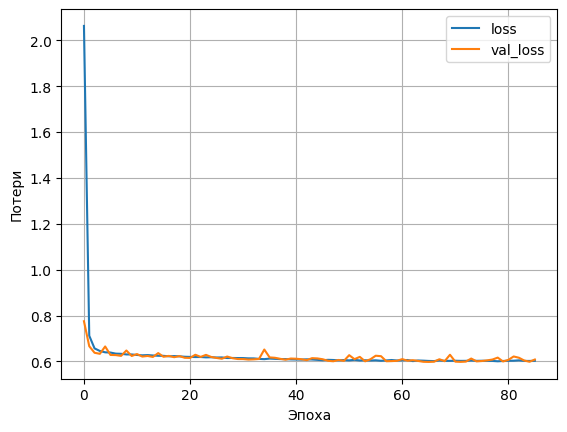

In [155]:
plot_loss(history)

In [156]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6018401384353638
Test accuracy: 0.6725465059280396
